In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

dataset = "../data/heart_disease_dataset.csv"

In [2]:
def fetch_data_source(filepath):
    try:
        # load the dataset
        df = pd.read_csv(filepath)
        print("dataset loaded \n")
        return df
    except Exception as e:
        print(e, "error loading the dataset")
        return None

In [3]:
# load the dataset
df = fetch_data_source(dataset)

dataset loaded 



In [4]:
print("df head")
print(df.head(10))

df head
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                   0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8                   1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9                   0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0 

In [5]:
# data shape
print("data shape")
print(df.shape)

data shape
(253680, 22)


In [6]:
# data info
print("data info")
print(df.info())

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  flo

In [7]:
# copy df for exploration
df_exploration = df.copy()

In [8]:
# features names
print("features names")
print(df_exploration.columns.to_list())

features names
['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [9]:
# features types
print("features types")
print(df_exploration.dtypes)

features types
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [10]:
# features missing values
print("features missing values")
print(df_exploration.isnull().sum())

features missing values
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [11]:
# features unique values
print("features unique values")
print(df_exploration.nunique())

features unique values
HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


In [12]:
# features noise
print("features noise")
print(df_exploration.describe())

features noise
       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253680.000000  253680.000000  253680.000000  253680.000000   
mean               0.094186       0.429001       0.424121       0.962670   
std                0.292087       0.494934       0.494210       0.189571   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       0.443169       0.040571       0.296921   
std         6.608694       0.496761       0.197294       0.698160   
min        12.000000    

In [13]:
# features distribution
print("features distribution")
print(df_exploration.info())

features distribution
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 n

In [14]:
# target nature
print("target nature")
print(df_exploration["HeartDiseaseorAttack"].value_counts())

target nature
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


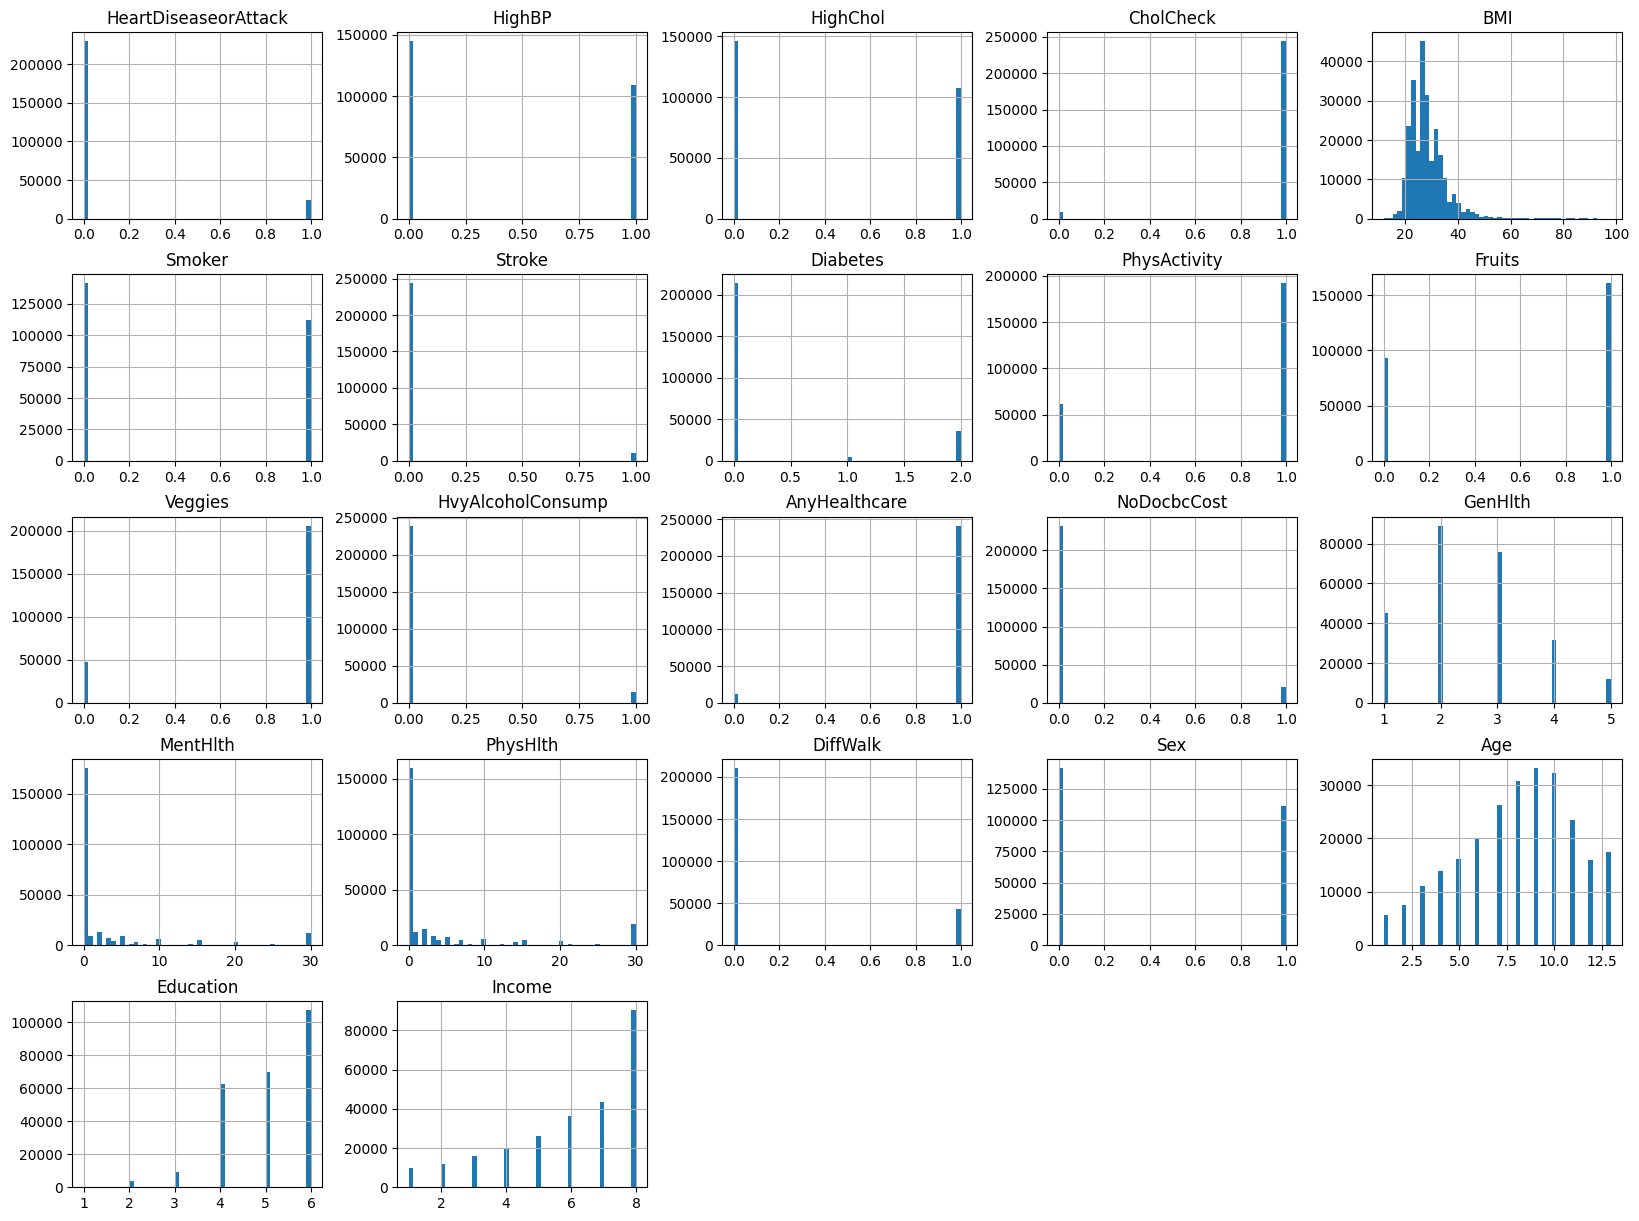

In [15]:
# visualize data
df_exploration.hist(bins=50, figsize=(20, 15))
plt.show()

In [16]:
# correlation matrix
corr_matrix = df_exploration.corr()
print("correlation matrix")
print(corr_matrix)

correlation matrix
                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.0

In [17]:
# correlation matrix on HeartDiseaseorAttack
print("correlation matrix HeartDiseaseorAttack")
print(corr_matrix["HeartDiseaseorAttack"].sort_values(ascending=False))

correlation matrix HeartDiseaseorAttack
HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64


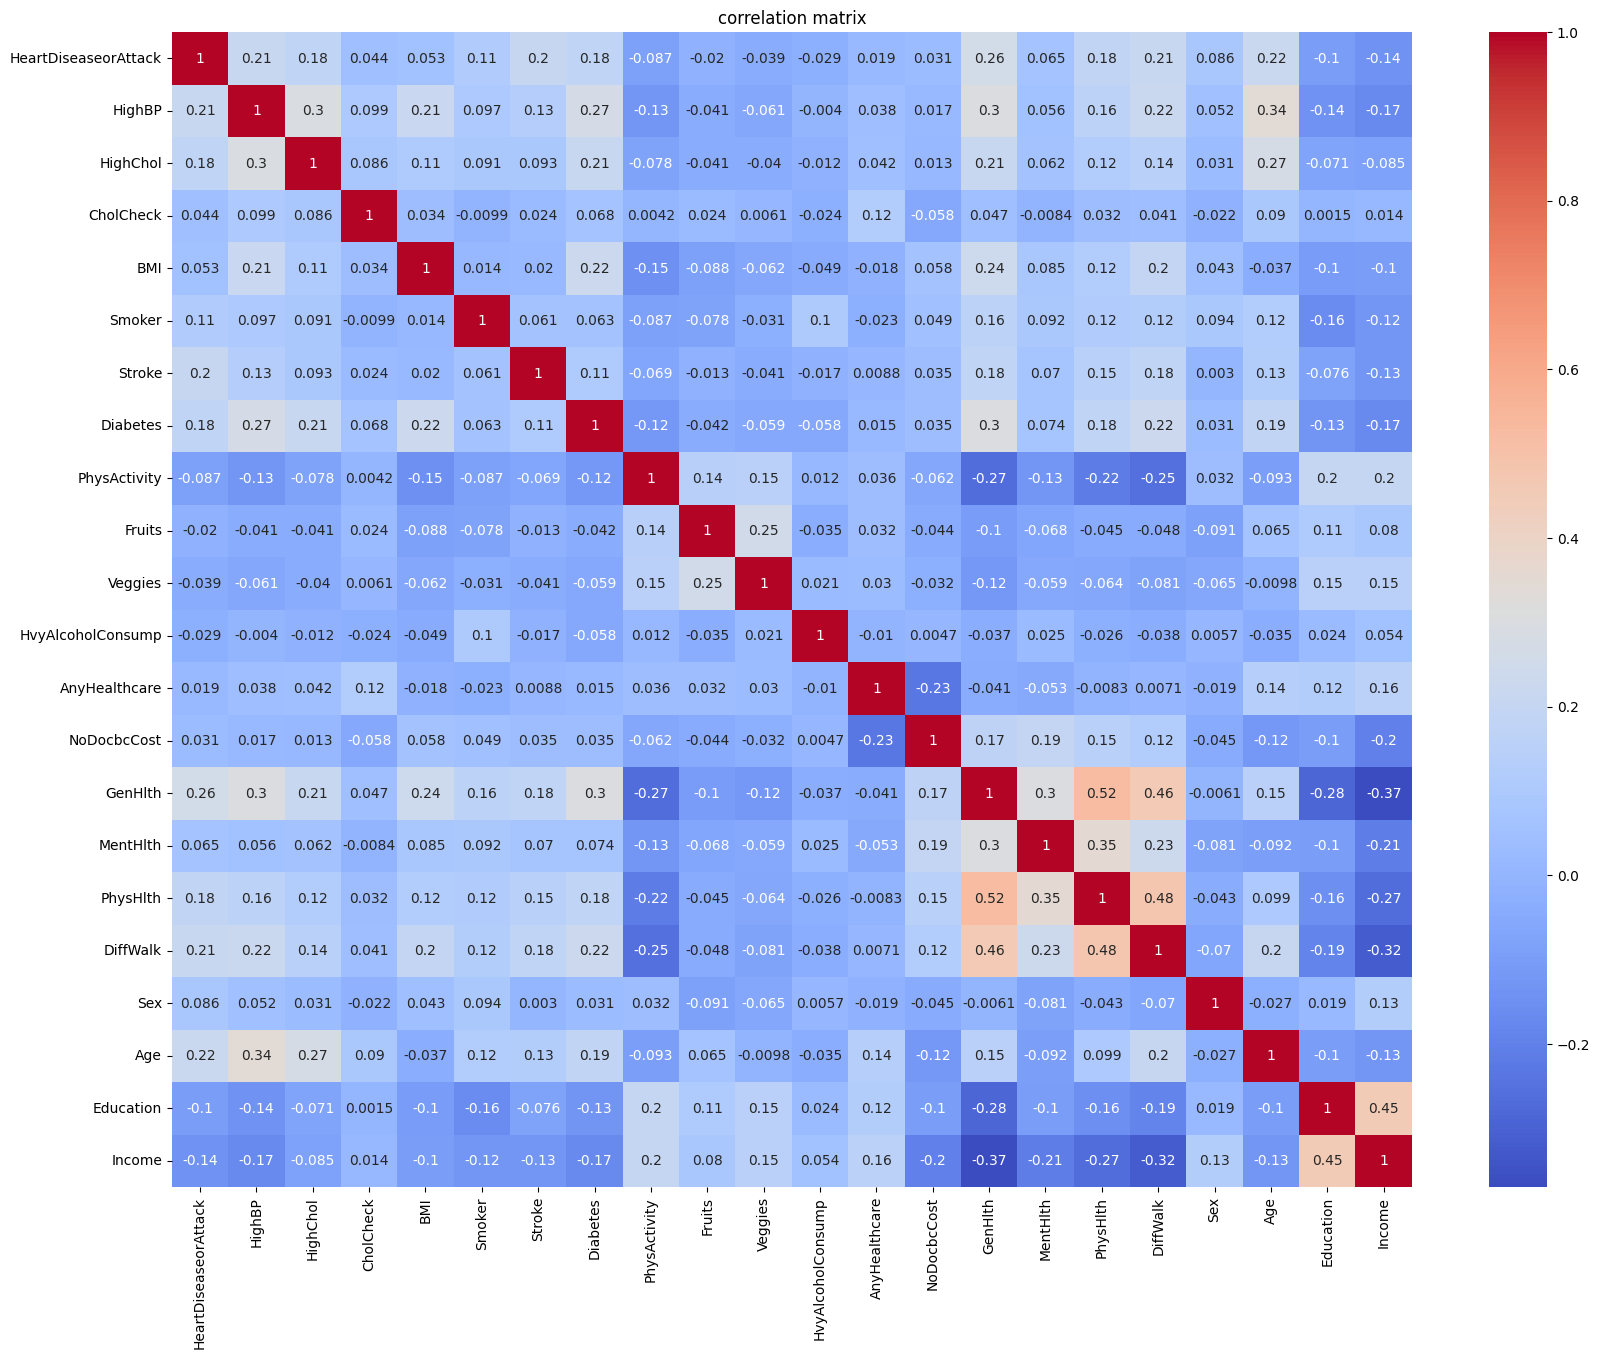

In [18]:
# visualize correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [19]:
# data cleaning
print("df_exploration shape before clean")
print(df.shape)


def clean_data(df):
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df


clean_data(df_exploration)

print("df_exploration shape after clean")
print(df_exploration.shape)

df_exploration shape before clean
(253680, 22)
df_exploration shape after clean
(229781, 22)


In [20]:
print(df.max())

HeartDiseaseorAttack     1.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
Stroke                   1.0
Diabetes                 2.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Sex                      1.0
Age                     13.0
Education                6.0
Income                   8.0
dtype: float64


In [21]:
# feature selection
corr_matrix = df.corr()
high_corr_features = corr_matrix["HeartDiseaseorAttack"].abs() > 0.1
selected_features = corr_matrix.loc[high_corr_features, "HeartDiseaseorAttack"].index.tolist()

print("high_corr_features per heart disease or attack")
print(selected_features)

high_corr_features per heart disease or attack
['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']


In [22]:
corr_matrix = df.corr()
high_corr_features = (corr_matrix.abs() > 0.3) & (corr_matrix < 1.0)
selected_features = corr_matrix.loc[high_corr_features.any()].index.tolist()

print("general high_corr_features")
print(selected_features)

general high_corr_features
['HighBP', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


In [23]:
# feature engineering
age_ranges = {
    1: (18, 24),
    2: (25, 29),
    3: (30, 34),
    4: (35, 39),
    5: (40, 44),
    6: (45, 49),
    7: (50, 54),
    8: (55, 59),
    9: (60, 64),
    10: (65, 69),
    11: (70, 74),
    12: (75, 79),
    13: (80, None),
}

real_age = df["Age"].map(age_ranges)
print("real_age")
print(real_age.head())

df["RealAge"] = real_age

real_age
0    (60, 64)
1    (50, 54)
2    (60, 64)
3    (70, 74)
4    (70, 74)
Name: Age, dtype: object


In [24]:
income_ranges = {
    1: 10000,
    2: 20000,   
    3: 30000,
    4: 40000,
    5: 50000,
    6: 60000,
    7: 70000,
    8: 80000,
}

real_income = df["Income"].map(income_ranges)
print("real_income")
print(real_income.head())

df["RealIncome"] = real_income

real_income
0    30000
1    10000
2    80000
3    60000
4    40000
Name: Income, dtype: int64


In [25]:
bins = [0, 18.5, 25, 30, 100]
labels = [1, 2, 3, 4]
classify_bmi = pd.cut(df["BMI"], bins=bins, labels=labels)
df["BMI"] = classify_bmi
print("classify_bmi")
print(classify_bmi)

classify_bmi
0         4
1         2
2         3
3         3
4         2
         ..
253675    4
253676    1
253677    3
253678    2
253679    2
Name: BMI, Length: 253680, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [26]:
income_per_sex = df.groupby("Sex")["Income"].transform("mean")
df["IncomePerSex"] = income_per_sex
print("income_per_sex")
print(income_per_sex)

income_per_age = df.groupby("Age")["Income"].transform("mean")
df["IncomePerAge"] = income_per_age
print("income_per_age")
print(income_per_age)

income_per_education = df.groupby("Education")["Income"].transform("mean")
df["IncomePerEducation"] = income_per_education
print("income_per_education")
print(income_per_education)

healthcare_per_income = df["AnyHealthcare"] / df["Income"] 
df["HealthcarePerIncome"] = healthcare_per_income
print("healthcare_per_income")
print(healthcare_per_income)

no_doctor_consultation_per_income = df["NoDocbcCost"] / df["Income"]
df["NoDoctorConsultationPerIncome"] = no_doctor_consultation_per_income
print("no_doctor_consultation_per_income")
print(no_doctor_consultation_per_income)

risk_score_health_data = df["HighBP"] + df["HighChol"] + df["Stroke"] + df["Diabetes"]
df["RiskScoreHealthData"] = risk_score_health_data
print("risk_score_health_data")
print(risk_score_health_data)

risk_score_lifestyle_data = df["Smoker"] + df["HvyAlcoholConsump"] + df["PhysActivity"] + df["Fruits"] + df["Veggies"]
df["RiskScoreLifestyleData"] = risk_score_lifestyle_data
print("risk_score_lifestyle_data")
print(risk_score_lifestyle_data)

bad_health = df["PhysHlth"] + df["MentHlth"]
df["BadHealth"] = bad_health
print("bad_health")
print(bad_health)

income_per_sex
0         5.820298
1         5.820298
2         5.820298
3         5.820298
4         5.820298
            ...   
253675    6.350742
253676    5.820298
253677    5.820298
253678    6.350742
253679    5.820298
Name: Income, Length: 253680, dtype: float64
income_per_age
0         6.116653
1         6.329102
2         6.116653
3         5.724515
4         5.724515
            ...   
253675    6.588476
253676    5.724515
253677    5.919979
253678    6.329102
253679    6.116653
Name: Income, Length: 253680, dtype: float64
income_per_education
0         5.189562
1         6.984850
2         5.189562
3         3.765457
4         5.876041
            ...   
253675    6.984850
253676    3.293099
253677    5.876041
253678    5.876041
253679    6.984850
Name: Income, Length: 253680, dtype: float64
healthcare_per_income
0         0.333333
1         0.000000
2         0.125000
3         0.166667
4         0.250000
            ...   
253675    0.142857
253676    0.250000
253677    0.5

In [27]:
def standard_scale(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled


df_scaled = standard_scale(df_exploration)
print("df_scaled")
print(df_scaled.head(10))

df_scaled
   HeartDiseaseorAttack    HighBP  HighChol  CholCheck       BMI    Smoker  \
0             -0.339257  1.095675  1.124132   0.205356  1.667220  1.071208   
1             -0.339257 -0.912679 -0.889575  -4.869594 -0.543101  1.071208   
2             -0.339257  1.095675  1.124132   0.205356 -0.101037 -0.933526   
3             -0.339257  1.095675 -0.889575   0.205356 -0.248391 -0.933526   
4             -0.339257  1.095675  1.124132   0.205356 -0.690456 -0.933526   
5             -0.339257  1.095675  1.124132   0.205356 -0.543101  1.071208   
6             -0.339257  1.095675 -0.889575   0.205356  0.193673  1.071208   
7             -0.339257  1.095675  1.124132   0.205356 -0.543101  1.071208   
8              2.947618  1.095675  1.124132   0.205356  0.193673  1.071208   
9             -0.339257 -0.912679 -0.889575   0.205356 -0.690456 -0.933526   

     Stroke  Diabetes  PhysActivity    Fruits  ...  AnyHealthcare  \
0 -0.216455 -0.449376     -1.658403 -1.258473  ...       0.238